# Predicting Heart Disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a
machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the following approach:

1. Problem definition
2. data
3. evaluation
4. features
5. modeling
6. experimentation

## 1.Problem definition

In a statement,
> given clinical parameters about a patient, can we predict wether or not they have a heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart
disease-uci

## 3. Evaluation

> if we can reach 95% accuracy at predicting whether or not  patient has heart disease during the proof of concept, we'll persue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

* age, age in years
* sex (1= male; 0 = female)
* cp chest pain type
* trestbpsresting blood pressure (in mm Hg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs (fasting blood sugar > 120 mg/dl) (1= true; 0= false)
* restecgresting electrocardiographic results
* thalachmaximum heart rate achieved
* exangexercise induced angina (1 = yes; 0 = no)
* oldpeakST depression induced by exercise relative to rest
slopethe slope of the peak exercise ST segment
* canumber of major vessels (0-3) colored by flourosopy
* tha13 - normal; 6 = fixed defect; 7 = reversable defect
* target1 or 0

1. age - age in years ,
2. sex - (1 = male; 0 = female),
3. cp - chest pain type,
    * 0: Typical angina: chest pain related decrease blood supply to the heart,
    * 1: Atypical angina: chest pain not related to heart,
    * 2: Non-anginal pain: typically esophageal spasms (non heart related),
    * 3: Asymptomatic: chest pain not showing signs of disease,
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital),
    * anything above 130-140 is typically cause for concern,
5. chol - serum cholestoral in mg/dl,
    * serum = LDL + HDL + .2 * triglycerides,
    * above 200 is cause for concern,
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),
    * '>126' mg/dL signals diabetes,
7. restecg - resting electrocardiographic results,
    * 0: Nothing to note,
    * 1: ST-T Wave abnormality,
        - can range from mild symptoms to severe problems,
        - signals non-normal heart beat,
    * 2: Possible or definite left ventricular hypertrophy,
        - Enlarged heart's main pumping chamber,
8. thalach - maximum heart rate achieved,
9. exang - exercise induced angina (1 = yes; 0 = no),
10. oldpeak - ST depression induced by exercise relative to rest,
    * looks at stress of heart during excercise,
    * unhealthy heart will stress more,
11. slope - the slope of the peak exercise ST segment,
    * 0: Upsloping: better heart rate with excercise (uncommon),
    * 1: Flatsloping: minimal change (typical healthy heart),
    * 2: Downslopins: signs of unhealthy heart,
12. ca - number of major vessels (0-3) colored by flourosopy,
    * colored vessel means the doctor can see the blood passing through,
    * the more blood movement the better (no clots),
13. thal - thalium stress result,
    * 1,3: normal,
    * 6: fixed defect: used to be defect but ok now,
    * 7: reversable defect: no proper blood movement when excercising ,
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We are going  to use numpy, pandas and matplotlib for data analysis and manipulation.

In [78]:
# import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the notebooks
%matplotlib inline 

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [3]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data exploration

**exploratory data analysis or EDA**

The goal here is to find out more about data and become a subject matter expert on the dataset you are working with

1. what question you are trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing from data and how you deal with it?
4. where are the outliers and why  should you care about them?
5. how can you add, remove and change features to get more out of your data?

In [4]:
# let's find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

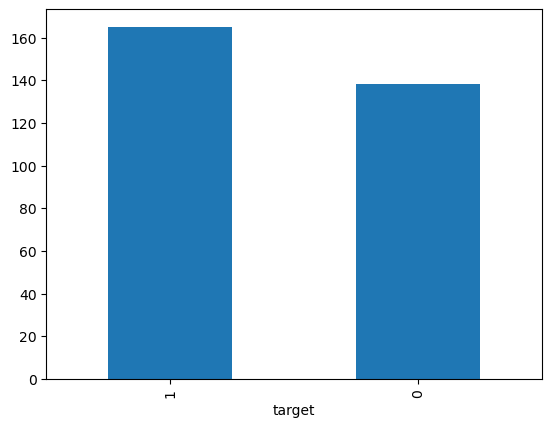

In [5]:
df["target"].value_counts().plot.bar();

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

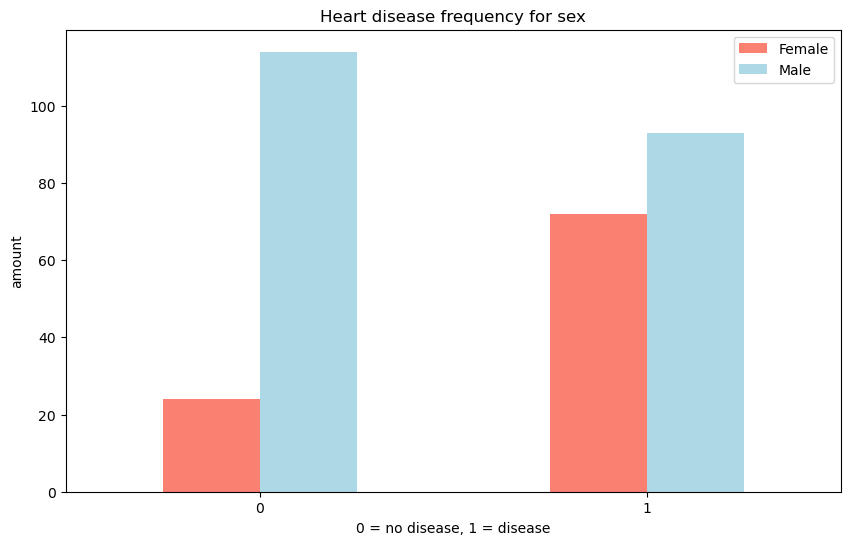

In [11]:
# create plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6),color=["salmon","lightblue"]);

plt.title("Heart disease frequency for sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0)

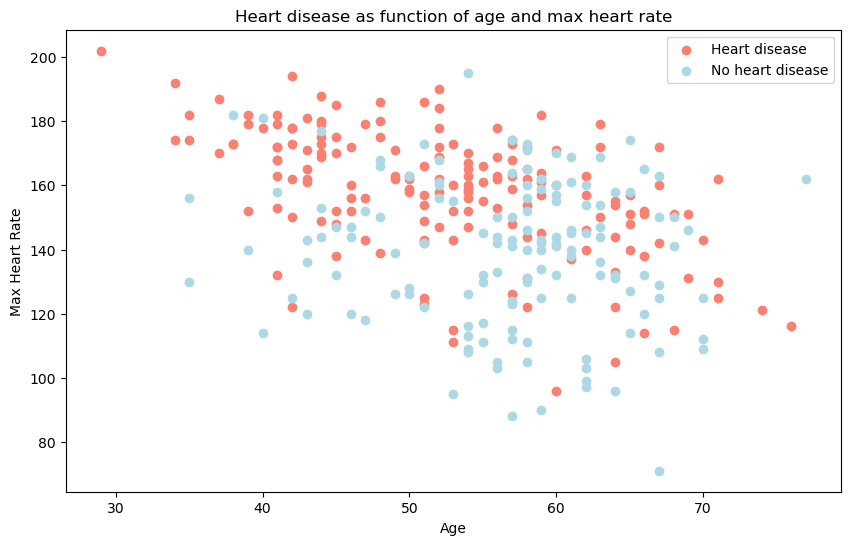

In [19]:
# create another figure
plt.figure(figsize=(10,6))

# scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c="salmon");

# scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           c="lightblue");

# add some helpful info
plt.title("Heart disease as function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart disease","No heart disease"]);

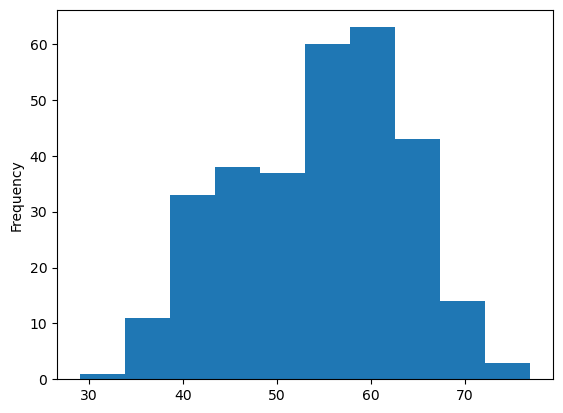

In [21]:
# check the distibution of age with histogram
df.age.plot.hist();

### Heart disease frequency per chest pain type

In [23]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


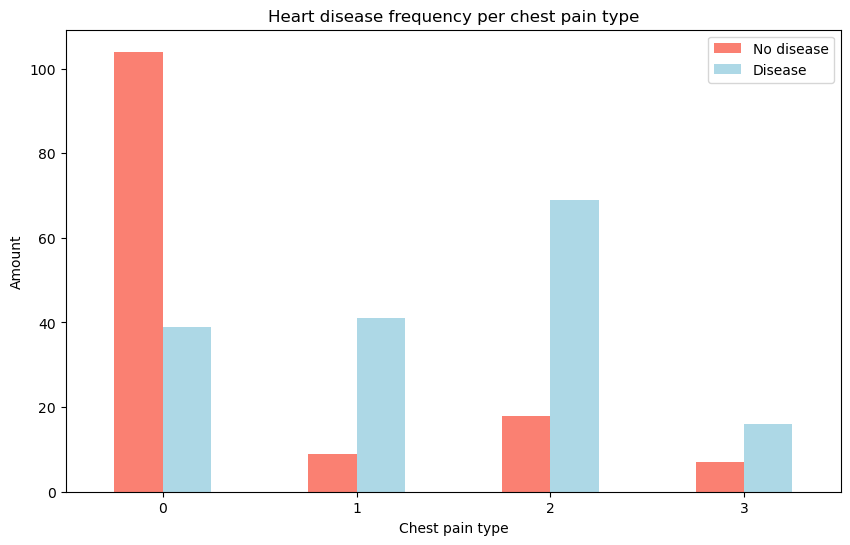

In [27]:
# make cross tab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])

# add some communication
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0);

In [28]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


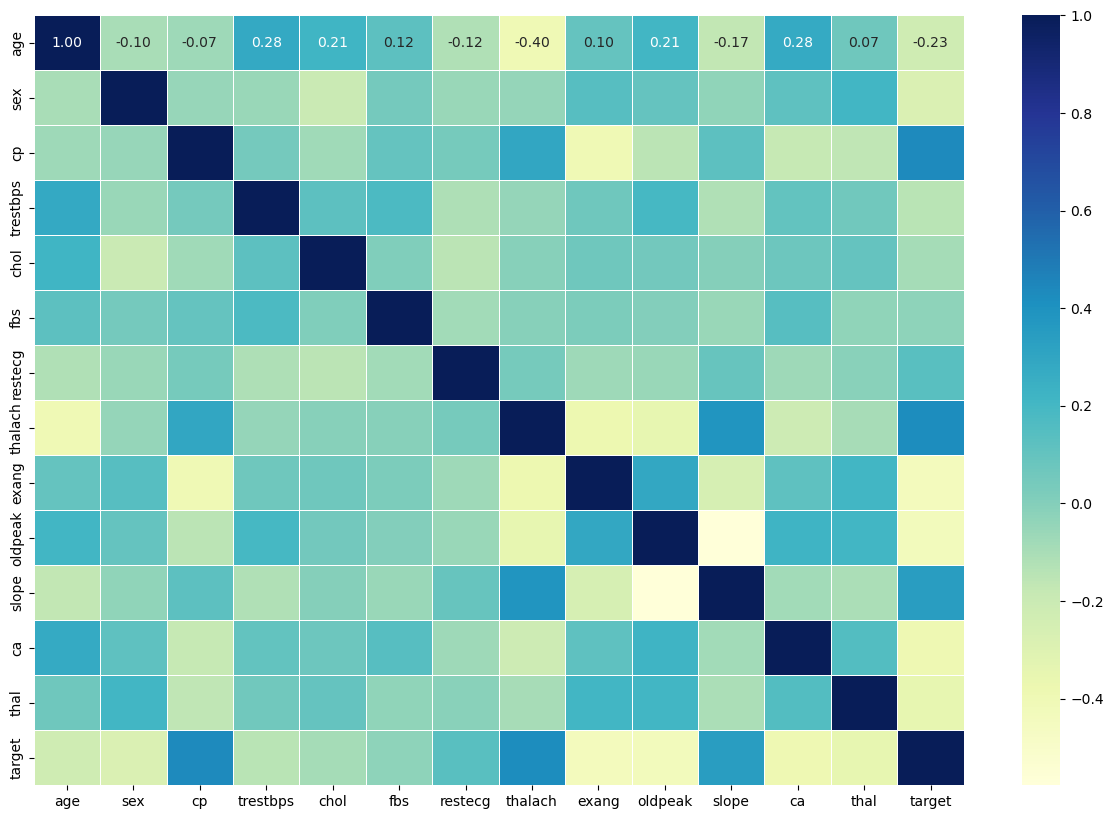

In [32]:
#lets make correlation matrix little more prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths =0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu")
                 

## 5. Modelling

In [36]:
# split data into x and y
X = df.drop("target",axis=1)
Y = df["target"]

np.random.seed(42)

# split into train and test dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We are going to use 3 Machine learning models

1. Logistic regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [37]:
# put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# create a function to fit and score model
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    fit and evaluate given machine learning model
    models: dict of different scikit learn models
    X and Y: data
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model score
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model
        model.fit(X_train, Y_train)
        # evaluate the model and append its score to model_score
        model_scores[name] = model.score(X_test,Y_test)
    return model_scores
    
    

In [40]:
model_scores=fit_and_score(models, X_train, X_test, Y_train, Y_test)
model_scores

/Users/abhisheksingh/Downloads/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

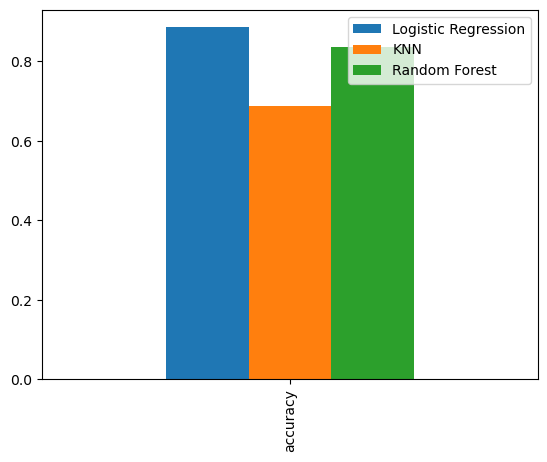

In [42]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot.bar();

Now we have got a baseline model, and we know model's first prediction arent always that we should based our next steps off. what should do?

Lets look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* classification report
* ROC curve
* Area under curve(AUC)

## HyperParameter Tuning(by hand)

In [48]:
# lets tune KNN
train_scores = []
test_scores = []

#create a list of different values of n_neighbors
neighbors = range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #fit the agorithm
    knn.fit(X_train,Y_train)
    #update the training score list
    train_scores.append(knn.score(X_train,Y_train))
    #update the test score list
    test_scores.append(knn.score(X_test,Y_test))

In [45]:
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

Maximum KNN score on the test data: 75.41%


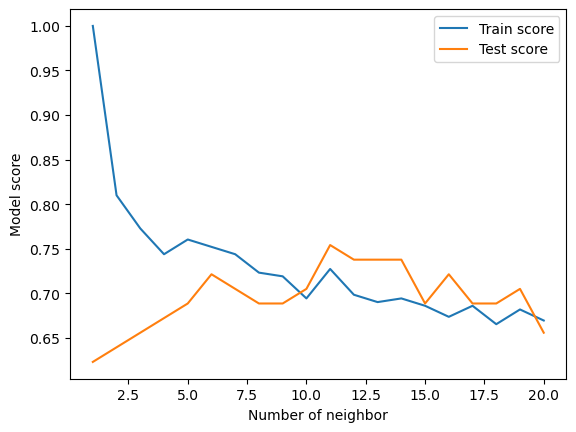

In [51]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbor")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%") 

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:

* LogisticRegression()
* Random Forest Classifier()

...using RandomizedSearchCV

In [62]:
## create hyperparameter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

#create a hyperparametergrid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth": [None,4,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using
RandomizedSearchCV...

In [58]:
# tune LogisticRegression
np.random.seed(42)
# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [59]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [60]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

Now lets tune RandomForestClassifier

In [64]:
# tune RandomForestClassifier
np.random.seed(42)
# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#fit random hyperparameter search model for Logistic Regression
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 4, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [65]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 4}

In [66]:
rs_rf.score(X_test,Y_test)

0.8688524590163934

## Hperparameter tuning with GridSearchCV

Since our LogisticRegression model provide best score so far, we will try and improve them again using GridSearchCV

In [69]:
# Different hyperparameter for our Logisticregression model
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

# setup grid hyperaparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)
# fit our grid hyperparameter model
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [70]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [71]:
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

In [72]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
  
... and it would be great if cross-validation was used where
possible.

To make comparison and evaluate our trained model, first we need to make predictions

In [73]:
# make prediction with tuned model
Y_preds = gs_log_reg.predict(X_test)

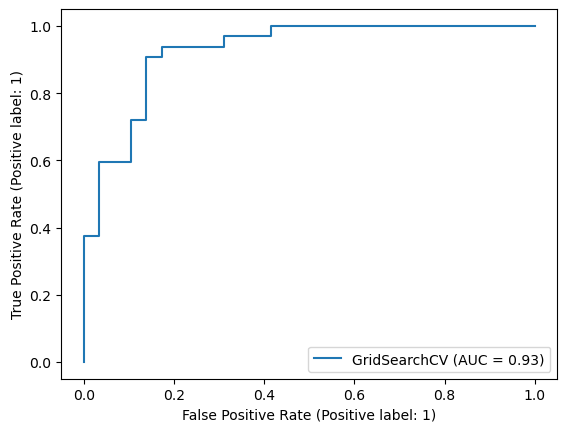

In [80]:
# plot ROC curve and evaluate AUC mertics
RocCurveDisplay.from_estimator(gs_log_reg, X_test, Y_test);

In [83]:
# Confusion matrix
print(confusion_matrix(Y_test,Y_preds))

[[25  4]
 [ 3 29]]


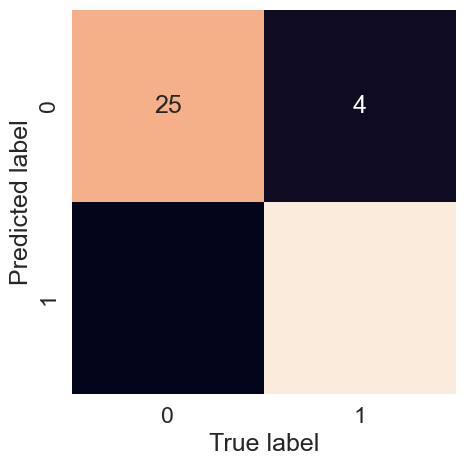

In [98]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test,Y_preds):
    """
    Plots a nice looking confusion matrix with seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(Y_test,Y_preds),
                    fmt='d',
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.tight_layout()
    

plot_conf_mat(Y_test,Y_preds)

Now we have got ROC curve, and AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and F1-score

In [99]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate metric evaluation with cross-validation

we are going to calculate precision, recall and f1-score  of our model using cross validation and to do so we will be using `cross_val_score`

In [100]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [102]:
# create a new classifier best parameters
clf = LogisticRegression(C= 0.20433597178569418, solver= "liblinear")

In [115]:
# cross validated accuracy
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [116]:
acc=np.mean(cv_acc)

In [117]:
# cross validated precision
cv_prec = cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_prec

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [118]:
prec=np.mean(cv_prec)

In [119]:
# cross validated recall
cv_rec = cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_rec

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [120]:
rec=np.mean(cv_rec)

In [121]:
# cross validated f1-score
cv_f1 = cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [122]:
f1=np.mean(cv_f1)

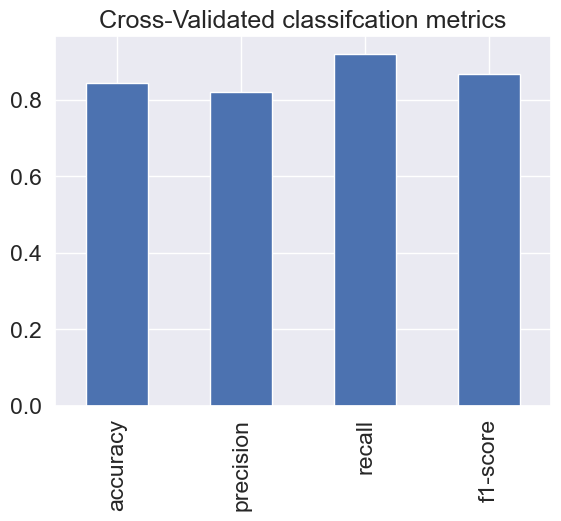

In [126]:
# visualize cross validated metrics
cv_metrics = pd.DataFrame({"accuracy":acc,
                          "precision":prec,
                          "recall":rec,
                          "f1-score":f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated classifcation metrics",legend=False);

### Feature importance

Feature importance is another as asking, "which features contributed
most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. Lets find feature importance for Logistic regression

In [129]:
# Fit an instance of logistic regression

clf = LogisticRegression(C= 0.20433597178569418, solver= "liblinear")
clf.fit(X_train, Y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [130]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [131]:
# match the coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

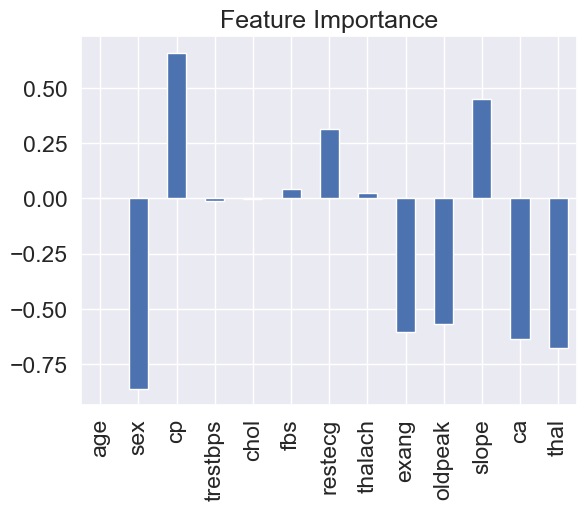

In [134]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend = False);